# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 3., 10., 34., 49., 45., 33., 18.,  7.,  0.,  1.]),
 array([-2.70357318, -2.07117473, -1.43877628, -0.80637782, -0.17397937,
         0.45841908,  1.09081753,  1.72321598,  2.35561444,  2.98801289,
         3.62041134]),
 <a list of 10 Patch objects>)

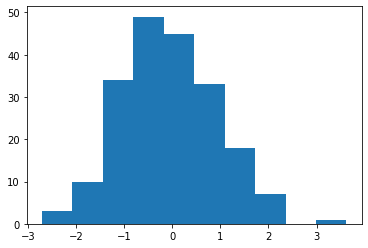

In [4]:
plt.hist(a)

In [6]:
# Dividimos en conjunto de entrenamiento (80%) y de testing (20%)
check = (a<0.8)
training = data[check]
testing = data[~check]

In [7]:
len(training), len(testing)

(161, 39)

In [8]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     683.6
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.62e-78
Time:                        17:26:01   Log-Likelihood:                -310.31
No. Observations:                 161   AIC:                             626.6
Df Residuals:                     158   BIC:                             635.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0577      0.330      9.265      0.000       2.406       3.709
TV             0.0453      0.002     28.709      0.000       0.042       0.048
Radio          0.1875      0.009     21.008      0.000       0.170       0.205
==============================================================================
Omnibus:                       62.223   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.377
Skew:                          -1.523   Prob(JB):                     2.28e-43
Kurtosis:                       7.472   Cond. No.                         433.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 3.0577 +0.0453*TV + 0.1875*Radio

## Validación del modelo con el conjunto de testing (validación cruzada)

In [11]:
sales_pred = lm.predict(testing)
sales_pred

3      17.661512
6      11.810647
15     20.849578
16     12.989505
20     18.142088
27     17.062861
35     16.992637
40     16.409658
44      9.012217
54     20.354731
56      8.655923
58     21.903250
60      5.855700
63     13.257974
70     17.811587
72     10.457674
73      9.986969
76      4.603123
77     13.857966
85     15.257347
90     10.058931
103    14.792347
104    20.276108
106     6.252020
115    13.020200
126    10.703141
131    15.612738
133    19.292767
135    14.055898
149     9.918687
155     5.417893
166    10.916893
167    13.398842
174    13.767969
177    12.228550
183    24.144440
189     6.172887
194    16.511462
196     8.242721
dtype: float64

In [12]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

112.75356467379174

In [13]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.7697580239006918

In [14]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean

In [15]:
error

0.13363129318901643